## 2601 particles

In [9]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# define the contour levels
phi_levels = np.linspace(0., 2., 1000)

In [2]:
weight = np.loadtxt("radial_expand_1.dat")
t_list = np.unique(weight[:,0])
nt = len(t_list)
nx = int(np.sqrt(len(weight[:,0])/nt))
data = weight[:,1].reshape(nt, nx, nx)

<IPython.core.display.Javascript object>


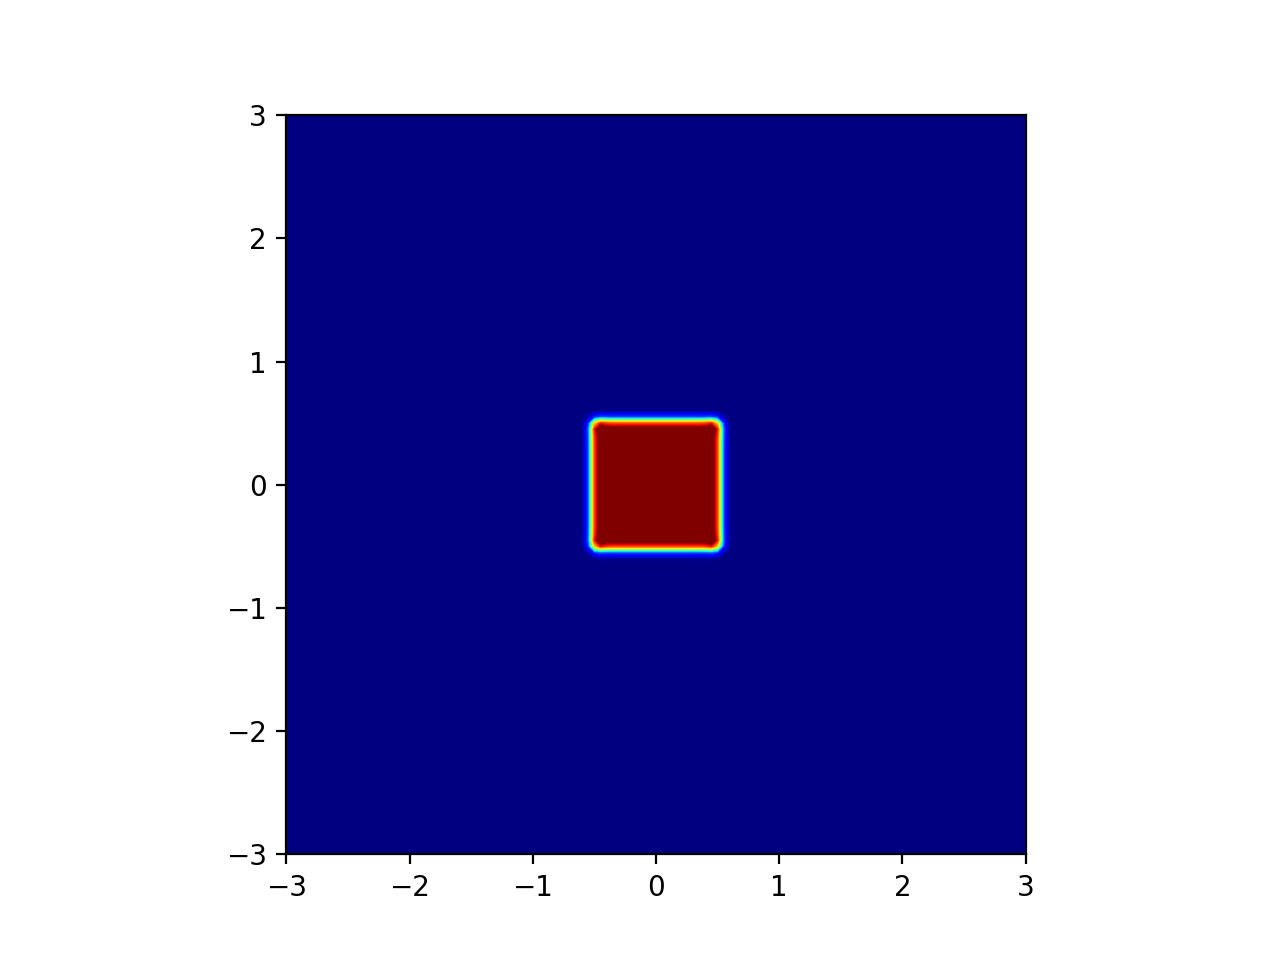

In [10]:
x = np.linspace(-3, 3, nx)
X, Y = np.meshgrid(x, x)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.contourf(X, Y, data[0,:,:], phi_levels, cmap='jet', extend='both')
ax1.set_aspect('equal')

fig1.savefig('radial_expand_init_1.png', bbox_inches='tight', dpi = 200.)

<IPython.core.display.Javascript object>


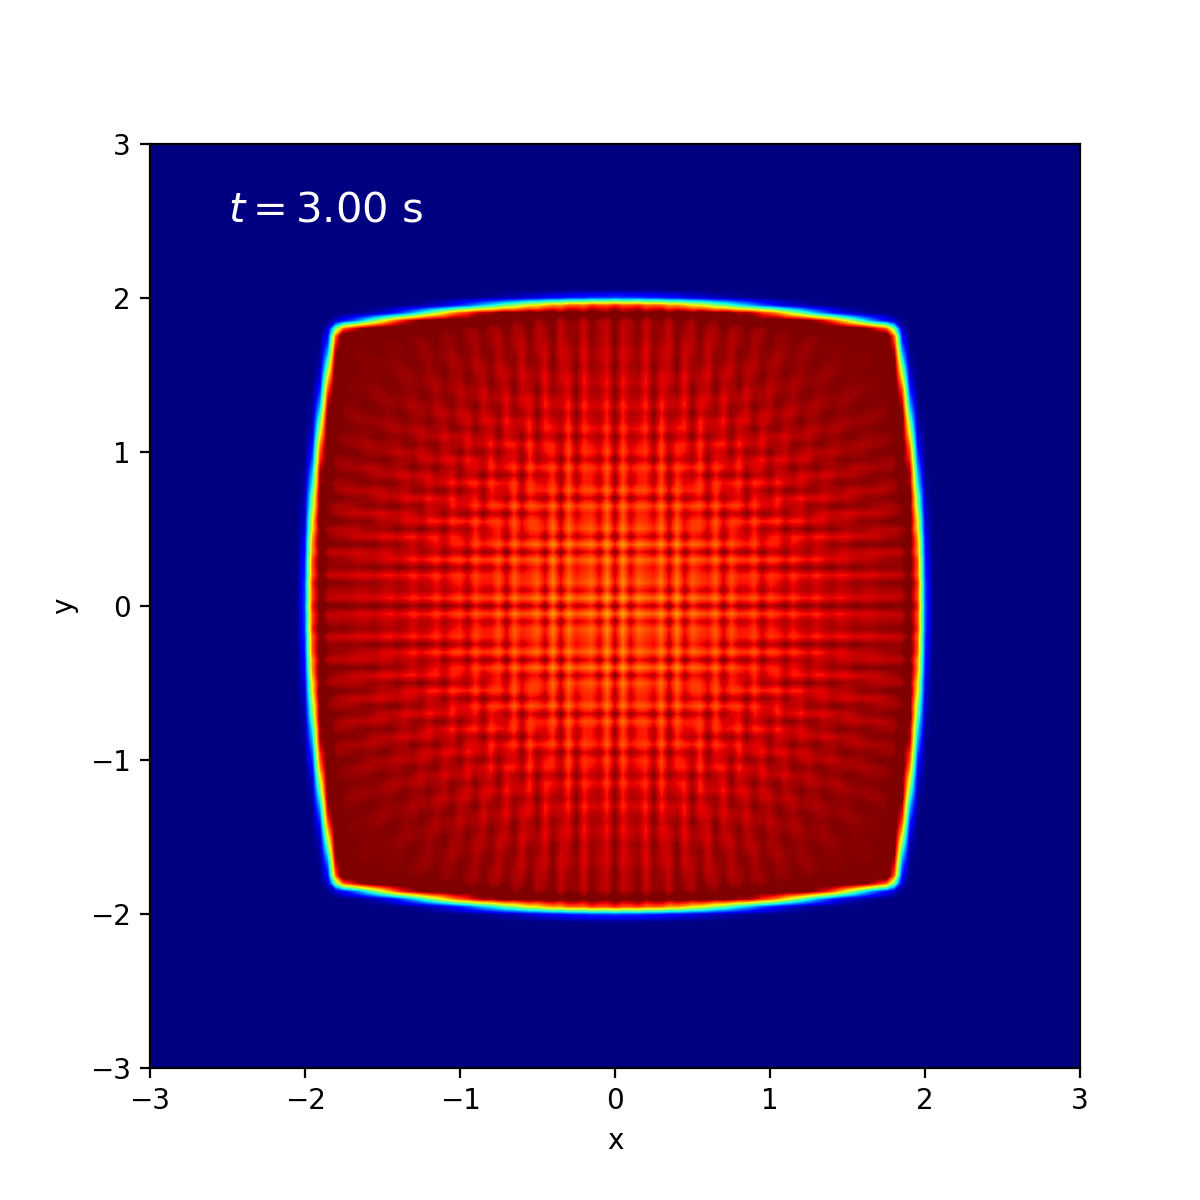

In [4]:
fig_anim = plt.figure(figsize=(6, 6))
ax_anim = fig_anim.add_subplot(1,1,1)
cont = ax_anim.contourf(X, Y, data[0,:,:], phi_levels, cmap='jet', extend='both')
time_text = ax_anim.text(-2.5, 2.5, r"$t = {0:4.2f}$ s".format(t_list[0]),
                      color="w", fontsize=15)
ax_anim.set_xlabel("x")
ax_anim.set_ylabel("y")
ax_anim.set_xlim([-3, 3])
ax_anim.set_ylim([-3, 3])

# animation function
def animate(i): 
    global cont, time_text
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = ax_anim.contourf(X, Y, data[i,:,:], phi_levels, cmap='jet', extend='both')
    time_text.set_text(r"$t = {0:4.2f}$ s".format(t_list[i]))
    return cont, time_text  
anim = animation.FuncAnimation(fig_anim, animate, frames=nt, repeat=False)
anim.save('radial_expand_anim_1.mp4', fps=10)

<IPython.core.display.Javascript object>


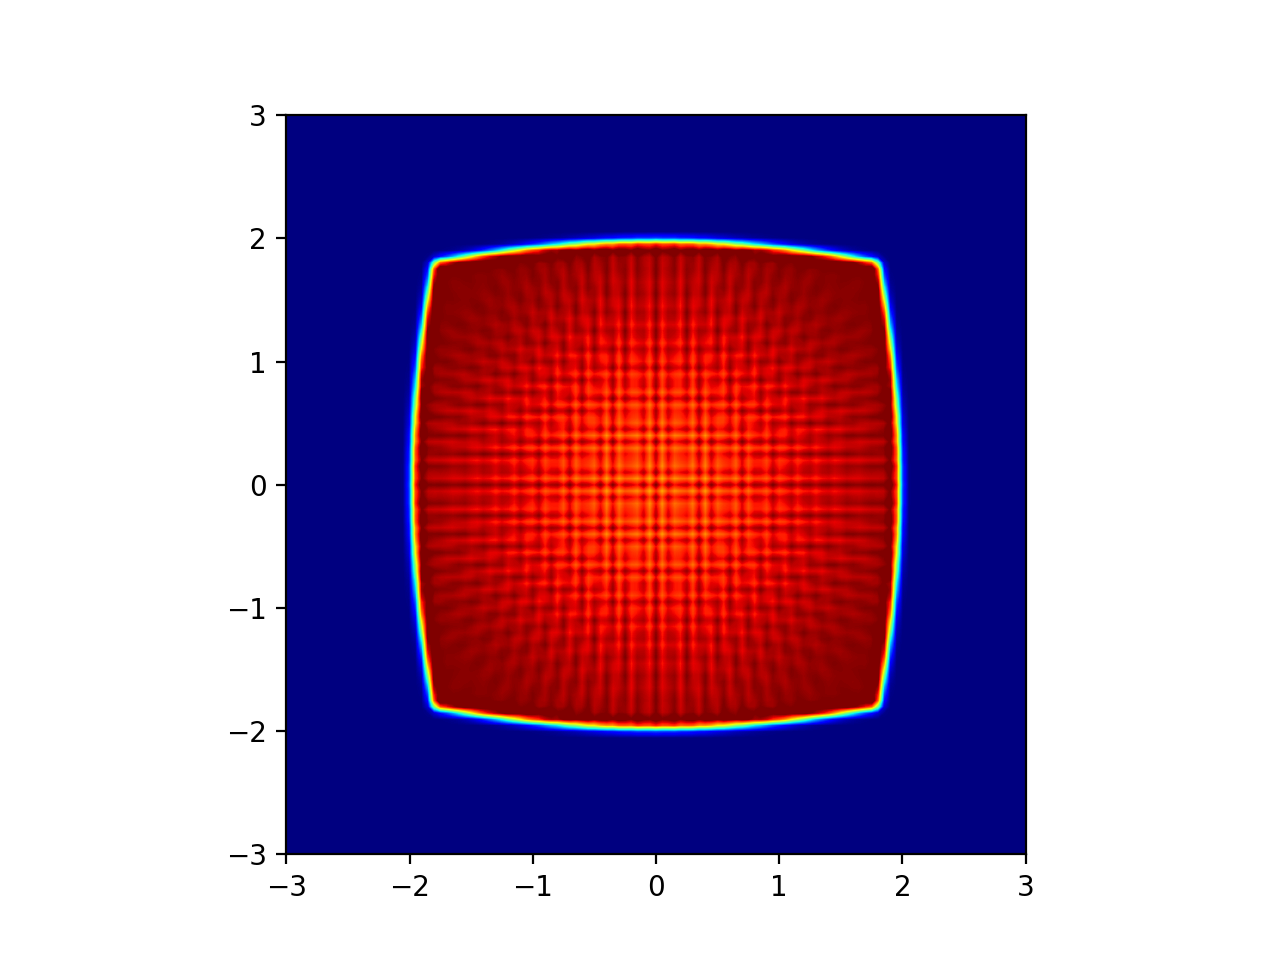

In [11]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.contourf(X, Y, data[nt-1,:,:], phi_levels, cmap='jet', extend='both')
ax2.set_aspect('equal')

fig2.savefig('radial_expand_final_1.png', bbox_inches='tight', dpi = 200.)